# BUSA3020 - Assignment 3  

**Assignment Points**: 100    
**Assignment Weight**: 20%   
**Due Date**: Friday of Week 11 at 11:59pm   

# **Import libraries and read data**

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('data.csv', index_col = 0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


# **Exploratory Data Analysis**

### Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


* There are 2000 observations and 7 columns in this dataset
* No missing values detected
* The average age is about 36 years
* The average income is about $121,000


## Data Visualisation 

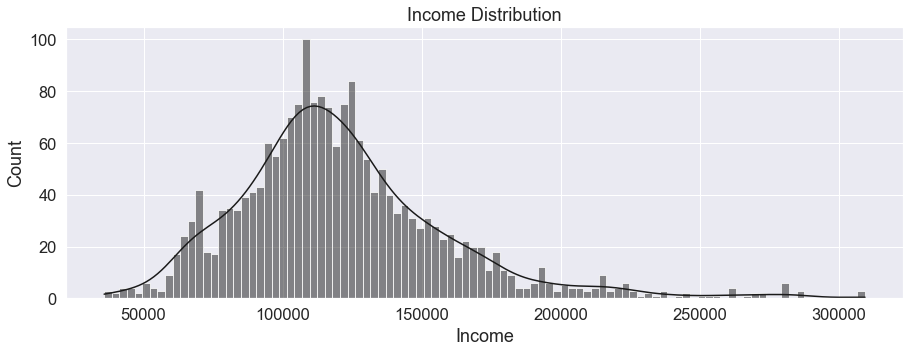

In [5]:
# observation on income distribution
plt.figure(figsize = (15,5))
sns.set(font_scale = 1.5)

plt.title('Income Distribution')
sns.set_color_codes("pastel")
sns.histplot(df['Income'],kde=True,bins=100, color="k")

plt.savefig("income dist.jpg")

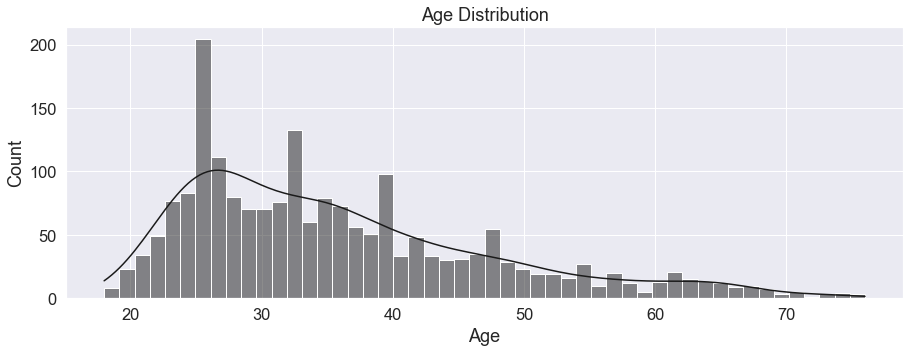

<Figure size 432x288 with 0 Axes>

In [6]:
# observation on age distribution
plt.figure(figsize = (15,5))
sns.set(font_scale = 1.5)

plt.title('Age Distribution')
sns.set_color_codes("pastel")
sns.histplot(df['Age'],kde=True,bins=50, color="k")
plt.show()

plt.savefig("age dist.jpg")

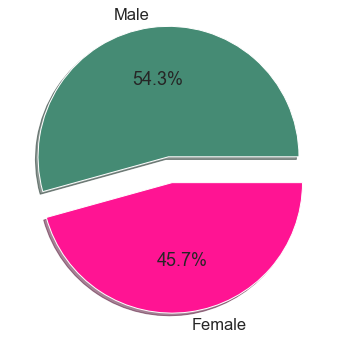

In [7]:
# Obervation on gender
plt.figure(figsize=(8,6))
labels=['Male', 'Female']
explode=[.1,.1]
colors = ["#458B74", "#FF1493"]
sizes=df.Sex.value_counts().values
plt.pie(sizes, explode, labels, autopct="%1.1f%%", shadow = True,colors = colors)
plt.savefig("gender.jpg")
plt.show()



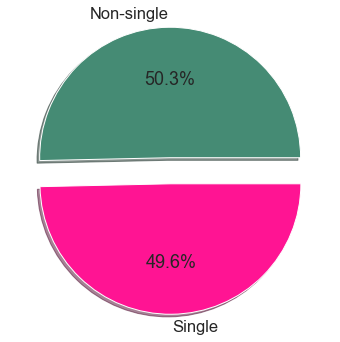

In [8]:
# Obersevation on Marriage status
plt.figure(figsize=(8,6))
labels=['Non-single', 'Single']
explode=[.1,.1]
colors = ["#458B74", "#FF1493"]
sizes=df['Marital status'].value_counts().values
plt.pie(sizes, explode, labels, autopct="%1.1f%%", shadow = True,colors = colors)
plt.savefig("marriage.jpg")
plt.show()

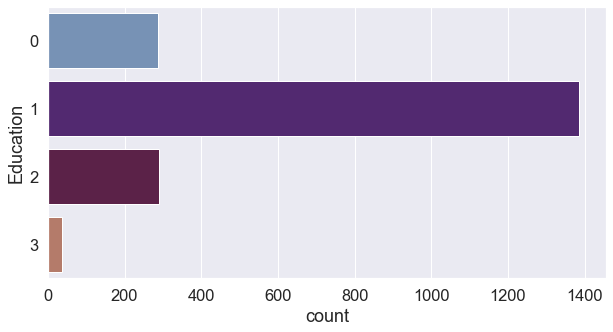

In [9]:
# Observation on education 
plt.figure(figsize=(10, 5))
sns.countplot(y ='Education', data = df, palette = "twilight")
plt.savefig("education.jpg")
plt.show()

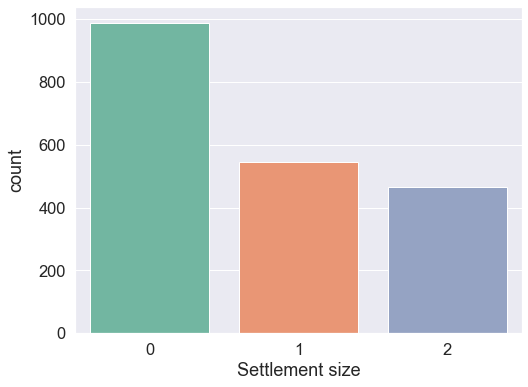

In [10]:
# Observation on Settlement size
plt.figure(figsize=(8, 6))
sns.countplot(x ='Settlement size', data = df, palette = "Set2")
plt.savefig("settlement.jpg") 
# Show the plot
plt.show()

Text(0.5, 0.98, 'Sex vs Occupation')

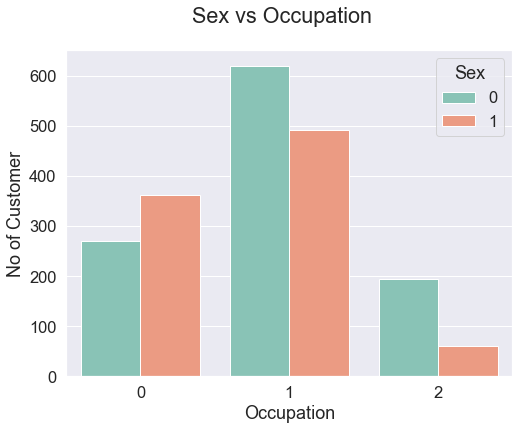

In [11]:
# Occupation vs. Gender
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="Occupation", hue="Sex", data=df, palette= ["#7fcdbb","#fc9272"],ax=ax)
ax.set_xlabel("Occupation")
ax.set_ylabel("No of Customer")
plt.savefig("occupation.jpg")
fig.suptitle("Sex vs Occupation")

Observations:

1. Income: Looks to be normally distributed. Maximum customer income is between 100,000 to 125,000.
2.  Age: In Age histogram most of the data falls to the right of the graph's peak is known as a right-skewed graph. Here we can see that most of the customers are of age 25 to 27.
3. 54.3% of customers are male, and 45.7% are females
4. 49% of the customers are single and 51% are those who are not single or those who are divorced / separated / married / widowed.
5. Here we can see that the majority of customers is those who have completed their high school and followed by those customers who are in university, least number of customers are those who have completed their graduate school.
6. Majority of customers work as skilled employee / official workers followed by those customers who are unemployed / unskilled and lowest customers who are management / self-employed / highly qualified employee / officer. Most of the customers who are skilled employees are men and less are women. Customers who are unemployed are mostly women and those customers who are self employed are mostly men.

# **Data Standardization**

In [12]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

# KMeans

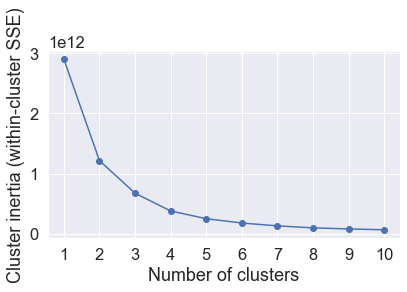

In [13]:
inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
plt.savefig("kmeans.jpg")
plt.show()

The optimal number of clusters here is 4

In [14]:
# Fitting model with number of cluster is 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [15]:
df['cluster']= kmeans.predict(df_scaled)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


In [16]:
# Grouping clusters using  mean values
df.groupby(['cluster']).agg('mean')

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


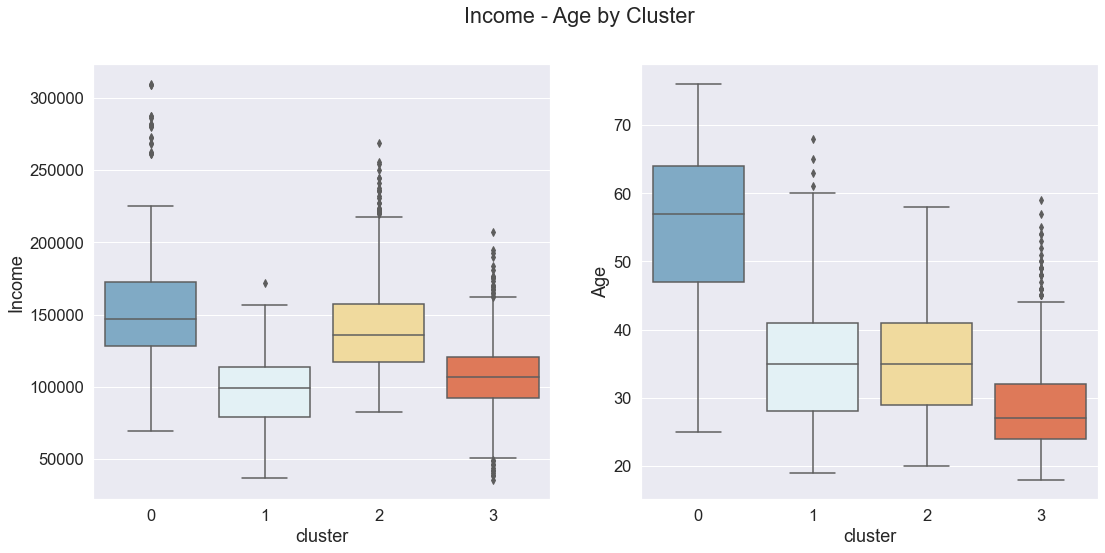

In [17]:
fig1, axes = plt.subplots(1, 2, figsize=(18, 8))
fig1.suptitle('Income - Age by Cluster')

sns.boxplot(ax=axes[0], data=df, x='cluster', y='Income', palette = "RdYlBu_r") #income boxplot
sns.boxplot(ax=axes[1], data=df, x='cluster', y='Age', palette = "RdYlBu_r") #age boxplot

plt.savefig("km age-income")

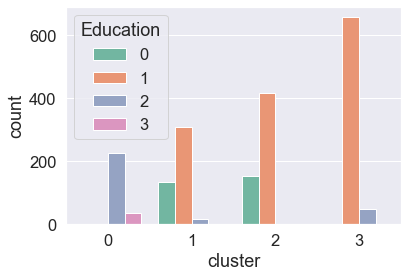

In [18]:
# observation on educations accross the clusters
sns.countplot(x = 'cluster', hue = 'Education', data = df, palette='Set2')
plt.savefig("kmeans_education.jpg") 
# Show the plot
plt.show()

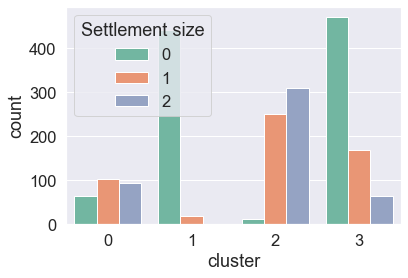

In [19]:
# observation on settlement size accross the clusters
sns.countplot(x = 'cluster', hue = 'Settlement size', data = df, palette='Set2')
plt.savefig("kmeans_settlement.jpg") 
# Show the plot
plt.show()

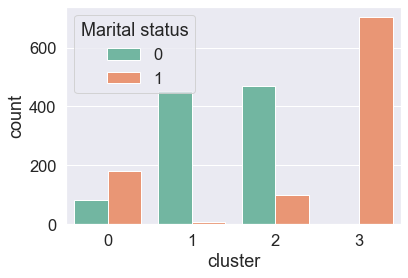

In [20]:
# observation on marital status accross the clusters
sns.countplot(x = 'cluster', hue = 'Marital status', data = df, palette='Set2')
plt.savefig("marital status.jpg") 
# Show the plot
plt.show()

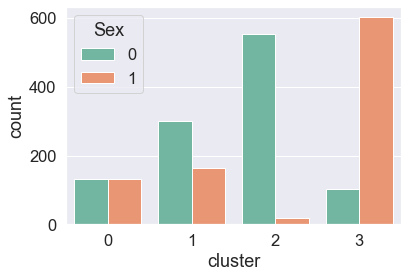

In [21]:
# observation on gender accross the clusters
sns.countplot(x = 'cluster', hue = 'Sex', data = df, palette='Set2')
plt.savefig("kmeans_gender.jpg") 
# Show the plot
plt.show()

**Insights**:

1. Cluster 0: The majority of cluster 0 customers are single male customers. The average age of this segment is 36 and average income is 140,000 USD which is considered as high-income group. Most of them have high school level of education and live in a mid-sized or large cities.
2. Cluster 1: Non-single women with an average income of 106,000 USD and an average age of 29 predominate in this group. These customers have a high school diploma and most of them are found in small and medium-sized cities.
3. Cluster 2: This cluster is dominated by singles living in small towns. This segment's average income is 97,800 USD, which is low when compared to other clusters, and the average age is 35. The majority of them have completed high school.
4. Cluster 3: With an average income of 158,000 USD and an average age of 55, this group is classified as high-income. In this group, there is not much of a gender divide. This group also has an elevated level of education because most of them are university/graduate school graduates. They are mostly non-single customers from various sized cities.


In [22]:
#drop cluster column to build new model
del df['cluster']

# Hierarchical Clustering

In [23]:
hie_clustering = linkage(df_scaled, method='ward')

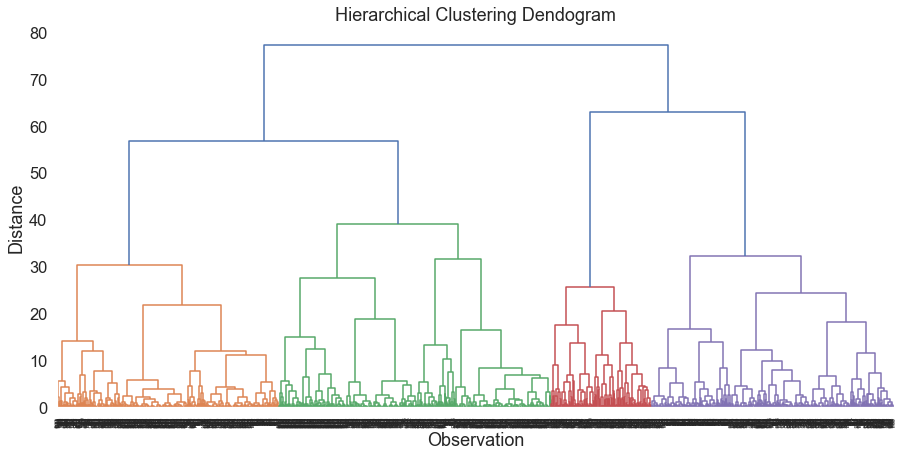

In [24]:
# construct dendrogram
plt.figure(figsize=(15,7))
plt.title ('Hierarchical Clustering Dendogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hie_clustering)
plt.savefig("dendogram.jpg") 
plt.show()

In [25]:
# number of cluster is 4.
labels = cut_tree(hie_clustering, n_clusters=4)

# create a label column
df['labels'] = labels
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,labels
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,2
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [26]:
#Checking groups using mean value
df.groupby(['labels']).agg('mean')

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
labels,,,,,,,
0,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917
1,0.711864,1.000000,28.062147,1.000000,120399.591337,1.075330,0.843691
2,0.640986,0.445300,34.583975,0.992296,90807.328197,0.101695,0.023112
3,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250


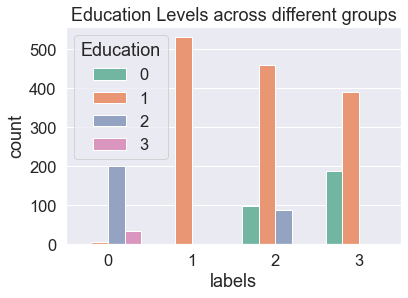

In [27]:
# observation on educations accross the clusters
sns.countplot(x = 'labels', hue = 'Education', data = df, palette='Set2')
plt.title('Education Levels across different groups')
plt.savefig("hc_education.jpg") 
# Show the plot
plt.show()

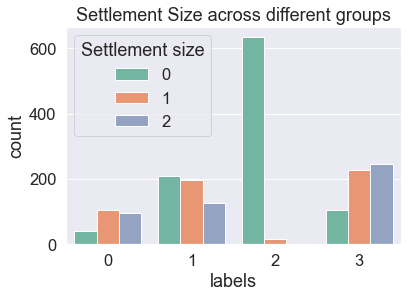

In [28]:
# observation on settlement size accross the clusters
sns.countplot(x = 'labels', hue = 'Settlement size', data = df, palette='Set2')
plt.title('Settlement Size across different groups')
plt.savefig("hc_settlement.jpg") 
# Show the plot
plt.show()

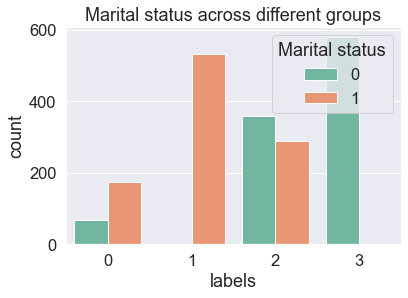

In [29]:
# observation on marital status accross the clusters
sns.countplot(x = 'labels', hue = 'Marital status', data = df, palette='Set2')
plt.title('Marital status across different groups')
plt.savefig("hc marital status.jpg") 
# Show the plot
plt.show()

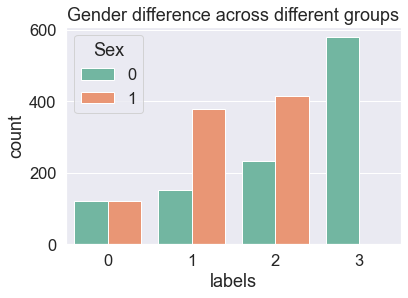

In [30]:
# observation on gender accross the clusters
sns.countplot(x = 'labels', hue = 'Sex', data = df, palette='Set2')
plt.title('Gender difference across different groups')
plt.savefig("hc_gender.jpg") 
# Show the plot
plt.show()

**Insights**:
1. Cluster 0: With an average income of 164,000 USD and an average age of 54, this cluster falls into the highage and high-income category. This non-single group resides in various sized cities and has a high educational status with university/graduate school qualifications.
2. Cluster 1: Most of this group is non-single females with an average age of 28 and an income of 120,000USD. This group is dominated by people with a high school diploma, and they live in diverse sizes of cities.
3. Cluster 2: Single females dominate this group. This group's average income is 90,800 USD, which is low when compared to other groups. This group's average age is 34 and they are mostly found in small towns.
4. Cluster 3: Single males dominate this group, with the majority of them residing in mid-sized to large cities. They have a high school education, are 37 years old on average, and earn 137,000 USD on average.